# Regressão logística

Os algoritmos de classificação resolvem problemas relacionados com tomada de decisão e que as variaveis de saida são categorias com uma lista de lebbals possiveis.

Além disso,temos os algoritmos de regressão. Dentre esses algoritmos temos a **regressão logística** com diversas aplicações em classificação. A regressão logística busca estimar a probabilidade da variavel dependente assumit uma determinada classe ou categoria, ou seja, uma resposta categórica. 



A função utilizada é a logistica ou sigmóide dada pela a função

        Y = 1/(1 + exp(-x))

Não é sensível a valores extremos (outliers) e por isso mais um motivo pra sua utilização.

a função **retorna valores entre zero ou um**, ou seja, valores em termo de probabilidade, assim é *descoberto a probabilidade de um valor está em uma determinada categoria*. 

Para um exemplo em que temos duas classes, a função retorna valores <0.5 para classificar valores na categoria 0, já valores >=0.5 para a categoria 1.

## Implementação 

Criar um modelo de regressão logística na base de dados do instituto nacional de diabetes e doenças digestivas do EUA para predizer se são doentes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Leitura dos dados de diabetes

In [20]:
df = pd.read_csv('diabetes.csv')

In [21]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


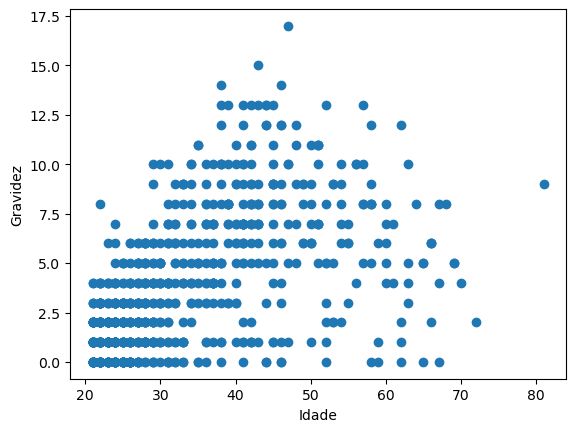

In [25]:
plt.plot(df['Age'],df['Pregnancies'],'o')
plt.xlabel('Idade')
plt.ylabel('Gravidez')
plt.show()

### Separando as variáveis dependentes

In [26]:
y = df['Outcome']

x = df.drop('Outcome', axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Separando os dados de treino e teste

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_treino, X_teste, y_treino, y_teste = train_test_split(x,y)

### Selecionar modelo de regressão logística

In [29]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter = 5000)

In [30]:
modelo.fit(X_treino,y_treino)

LogisticRegression(max_iter=5000)

In [31]:
y_previsto = modelo.predict(X_teste)
print(y_previsto[:10])

[1 0 0 0 0 0 0 0 0 0]


In [32]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_teste,y_previsto)

In [33]:
print(acuracia*100.)

76.5625
